In [2]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_1 = pd.read_csv("AIDAWeek10_InClass_Longley.csv")
df_1.head()

,Obs,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1,60323,83.0,234289,2356,1590,107608,1947
1,2,61122,88.5,259426,2325,1456,108632,1948
2,3,60171,88.2,258054,3682,1616,109773,1949
3,4,61187,89.5,284599,3351,1650,110929,1950
4,5,63221,96.2,328975,2099,3099,112075,1951


In [4]:
df = df_1.drop(['TOTEMP'], axis=1)
df.head()

,Obs,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,1,83.0,234289,2356,1590,107608,1947
1,2,88.5,259426,2325,1456,108632,1948
2,3,88.2,258054,3682,1616,109773,1949
3,4,89.5,284599,3351,1650,110929,1950
4,5,96.2,328975,2099,3099,112075,1951


In [5]:
df2 = df.drop(['YEAR'], axis=1)
df2.head()


,Obs,GNPDEFL,GNP,UNEMP,ARMED,POP
0,1,83.0,234289,2356,1590,107608
1,2,88.5,259426,2325,1456,108632
2,3,88.2,258054,3682,1616,109773
3,4,89.5,284599,3351,1650,110929
4,5,96.2,328975,2099,3099,112075


In [7]:
df3 = df2.drop(['Obs'], axis=1)
df3.head()


,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289,2356,1590,107608
1,88.5,259426,2325,1456,108632
2,88.2,258054,3682,1616,109773
3,89.5,284599,3351,1650,110929
4,96.2,328975,2099,3099,112075


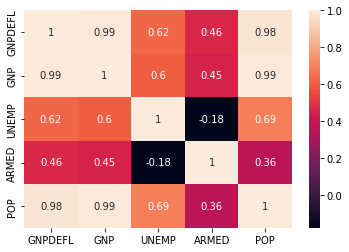

In [9]:
sns.heatmap(df3.corr(), annot=True)
plt.show()

In [10]:
x = df3
x.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289,2356,1590,107608
1,88.5,259426,2325,1456,108632
2,88.2,258054,3682,1616,109773
3,89.5,284599,3351,1650,110929
4,96.2,328975,2099,3099,112075


In [11]:
y = df_1['TOTEMP']
y.head()

0    60323
1    61122
2    60171
3    61187
4    63221
Name: TOTEMP, dtype: int64

In [ ]:
import statsmodels.api as sm
# Add a constant to get an intercept
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

In [13]:
from statsmodels.multivariate.pca import PCA
pc = PCA(df3, ncomp=3,standardize = True)
#should only have x
#standardize because the data has different units Rs/number etc

df_comp = pc.loadings.T #pc.loadings are the eigen vectors that we computed
#We are transposing it so that we can see it nicely
df_comp

ModuleNotFoundError: No module named 'statsmodels'

In [14]:
#PCA scores
x_scores = pc.factors
x_scores

NameError: name 'pc' is not defined

In [ ]:
sns.heatmap(x_scores.corr(), annot=True)
plt.show()

In [ ]:
#First run the PCA and do the following
#This adds the constant term b0 to the Multilinear Regression

x_pca = sm.add_constant(x_scores)
model = sm.OLS(y, x_pca).fit()
model.summary()